In [4]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [10]:
# 2. Load your dataset
df = pd.read_csv("embedded_system_network_security_dataset.csv")
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [6]:
# 3. Select numerical features (same idea as notebook)
features = df[[
    'packet_size',
    'inter_arrival_time',
    'packet_count_5s',
    'mean_packet_size',
    'spectral_entropy',
    'frequency_band_energy'
]]

In [7]:
# 4. Scale features (important for Isolation Forest)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 5. Apply Isolation Forest (same model logic)
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    random_state=42
)

df['anomaly'] = iso_forest.fit_predict(scaled_features)
#  1  = normal
# -1  = anomaly

In [8]:
# 6. Split data
normal = df[df['anomaly'] == 1]
abnormal = df[df['anomaly'] == -1]


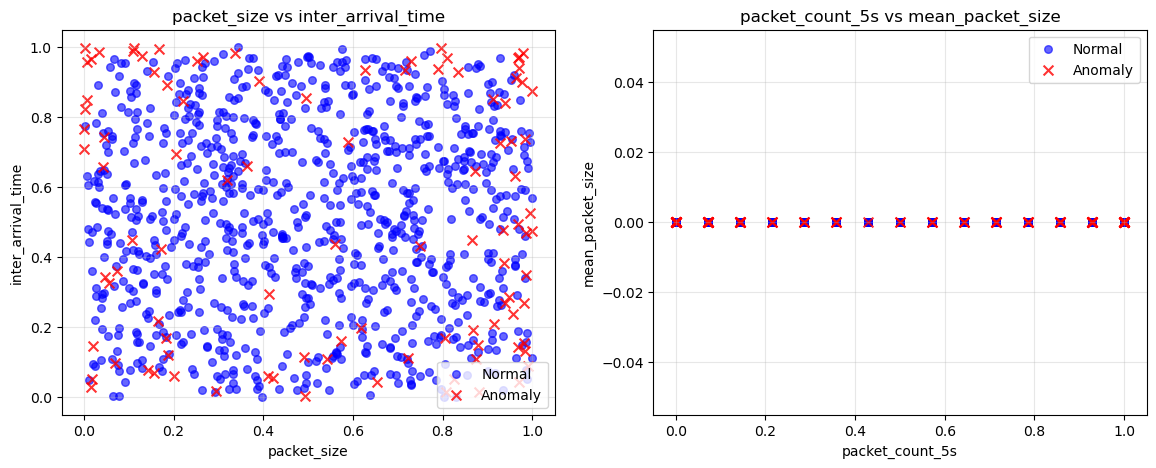

Normal data points: 900
Anomalies detected: 100


In [12]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))



# Plot 1: CO vs C6H6
axes[0].scatter(normal['packet_size'], normal['inter_arrival_time'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(abnormal['packet_size'], abnormal['inter_arrival_time'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x' )
axes[0].set_xlabel('packet_size')
axes[0].set_ylabel('inter_arrival_time')
axes[0].set_title('packet_size vs inter_arrival_time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: NOx vs NO2
axes[1].scatter(normal['packet_count_5s'], normal['mean_packet_size'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(abnormal['packet_count_5s'], abnormal['mean_packet_size'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x' )
axes[1].set_xlabel('packet_count_5s')
axes[1].set_ylabel('mean_packet_size')
axes[1].set_title('packet_count_5s vs mean_packet_size')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.show()
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(abnormal)}")


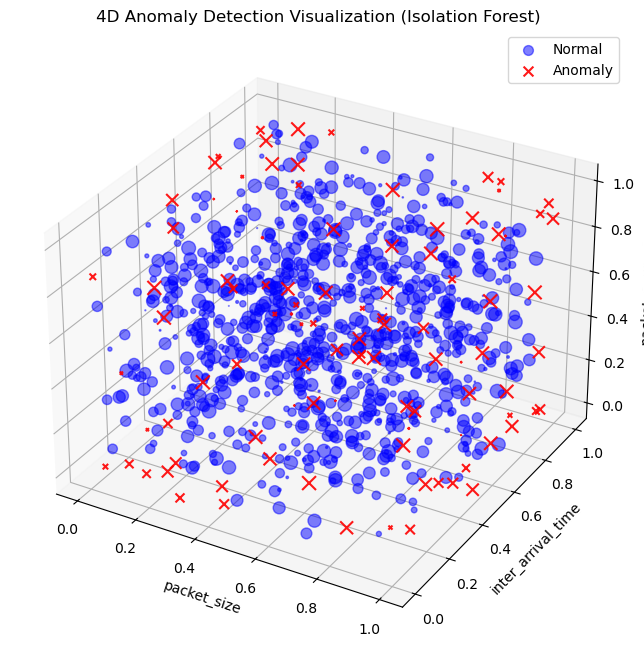

Normal points: 900
Anomalies detected: 100


In [9]:
# 7. 4D Visualization (same visualization idea, extended)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    normal['packet_size'],
    normal['inter_arrival_time'],
    normal['packet_count_5s'],
    c='blue',
    alpha=0.5,
    s=normal['spectral_entropy'] * 100,
    label='Normal'
)

ax.scatter(
    abnormal['packet_size'],
    abnormal['inter_arrival_time'],
    abnormal['packet_count_5s'],
    c='red',
    alpha=0.9,
    s=abnormal['spectral_entropy'] * 100,
    marker='x',
    label='Anomaly'
)

ax.set_xlabel('packet_size')
ax.set_ylabel('inter_arrival_time')
ax.set_zlabel('packet_count_5s')
ax.set_title('4D Anomaly Detection Visualization (Isolation Forest)')
ax.legend()

plt.show()

print("Normal points:", len(normal))
print("Anomalies detected:", len(abnormal))